In [2]:
import numpy as np, pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

In [3]:
class cfg:
    file_path = '../data/'
    TARGET = 'NObeyesdad'
    RANDOM_SEED = 42

In [4]:
# load all data
train = pd.read_csv(os.path.join(cfg.file_path, "train.csv"))
test = pd.read_csv(os.path.join(cfg.file_path, "test.csv"))

In [5]:
def prettify_df(df):
    table = PrettyTable()
    table.field_names = df.columns

    for row in df.values:
        table.add_row(row)
    print(table)

In [6]:
# Train Data
print("Train Data")
print(f"Total number of rows: {len(train)}")
print(f"Total number of columns: {train.shape[1]}\n")

# Test Data
print("Test Data")
print(f"Total number of rows: {len(test)}")
print(f"Total number of columns:{test.shape[1]}")

Train Data
Total number of rows: 20758
Total number of columns: 18

Test Data
Total number of rows: 13840
Total number of columns:17


In [7]:
# check null and unique count
# FHWO: family_history_with_overweight
train_copy = train.rename(columns={"family_history_with_overweight":"FHWO"})
tmp = pd.DataFrame(index=train_copy.columns)
tmp['count'] = train_copy.count()
tmp['dtype'] = train_copy.dtypes
tmp['nunique'] = train_copy.nunique()
tmp['%nunique'] = (tmp['nunique']/len(train_copy))*100
tmp['%null'] = (train_copy.isnull().sum()/len(train_copy))*100
tmp['min'] = train_copy.min()
tmp['max'] = train_copy.max()
tmp

tmp.reset_index(inplace=True)
tmp = tmp.rename(columns = {"index":"Column Name"})
tmp = tmp.round(3)
prettify_df(tmp)
del tmp, train_copy

+-------------+-------+---------+---------+----------+-------+---------------------+---------------------+
| Column Name | count |  dtype  | nunique | %nunique | %null |         min         |         max         |
+-------------+-------+---------+---------+----------+-------+---------------------+---------------------+
|      id     | 20758 |  int64  |  20758  |  100.0   |  0.0  |          0          |        20757        |
|    Gender   | 20758 |  object |    2    |   0.01   |  0.0  |        Female       |         Male        |
|     Age     | 20758 | float64 |   1703  |  8.204   |  0.0  |         14.0        |         61.0        |
|    Height   | 20758 | float64 |   1833  |   8.83   |  0.0  |         1.45        |       1.975663      |
|    Weight   | 20758 | float64 |   1979  |  9.534   |  0.0  |         39.0        |      165.057269     |
|     FHWO    | 20758 |  object |    2    |   0.01   |  0.0  |          no         |         yes         |
|     FAVC    | 20758 |  object |    

In [8]:
# Target Distribution with Gender

pd.set_option('display.float_format', '{:.2f}'.format)
tmp = pd.DataFrame(train.groupby([cfg.TARGET,'Gender'])["id"].agg('count'))
tmp.columns = ['Count']
train[cfg.TARGET].value_counts()
tmp = pd.merge(tmp,train[cfg.TARGET].value_counts(),left_index=True, right_index=True)
tmp.columns = ['gender_count','target_class_count']
tmp['%gender_count'] = tmp['gender_count']/tmp['target_class_count']
tmp["%target_class_count"] = tmp['target_class_count']/len(train) 
tmp = tmp[['gender_count','%gender_count','target_class_count','%target_class_count']]
print("Target Distribution with Gender")
tmp

Target Distribution with Gender


gender_count  %gender_count  target_class_count  \
NObeyesdad          Gender                                                    
Insufficient_Weight Female          1621           0.64                2523   
                    Male             902           0.36                2523   
Normal_Weight       Female          1660           0.54                3082   
                    Male            1422           0.46                3082   
Obesity_Type_I      Female          1267           0.44                2910   
                    Male            1643           0.56                2910   
Obesity_Type_II     Female             8           0.00                3248   
                    Male            3240           1.00                3248   
Obesity_Type_III    Female          4041           1.00                4046   
                    Male               5           0.00                4046   
Overweight_Level_I  Female          1070           0.44                2427   
                    Male            1357           0.56                2427   
Overweight_Level_II Female           755           0.30                2522   
                    Male            1767           0.70                2522   

                            %target_class_count  
NObeyesdad          Gender                       
Insufficient_Weight Female                 0.12  
                    Male                   0.12  
Normal_Weight       Female                 0.15  
                    Male                   0.15  
Obesity_Type_I      Female                 0.14  
                    Male                   0.14  
Obesity_Type_II     Female                 0.16  
                    Male                   0.16  
Obesity_Type_III    Female                 0.19  
                    Male                   0.19  
Overweight_Level_I  Female                 0.12  
                    Male                   0.12  
Overweight_Level_II Female                 0.12  
                    Male                   0.12

In [9]:
raw_num_cols = list(train.select_dtypes("float").columns) 
raw_cat_cols = list(train.columns.drop(raw_num_cols+[cfg.TARGET]))

full_form = dict({'FAVC' : "Frequent consumption of high caloric food",
                  'FCVC' : "Frequency of consumption of vegetables",
                  'NCP' :"Number of main meal",
                  'CAEC': "Consumption of food between meals",
                  'CH2O': "Consumption of water daily",
                  'SCC':  "Calories consumption monitoring",
                  'FAF': "Physical activity frequency",
                  'TUE': "Time using technology devices",
                  'CALC': "Consumption of alcohol" ,
                  'MTRANS' : "Transportation used"})

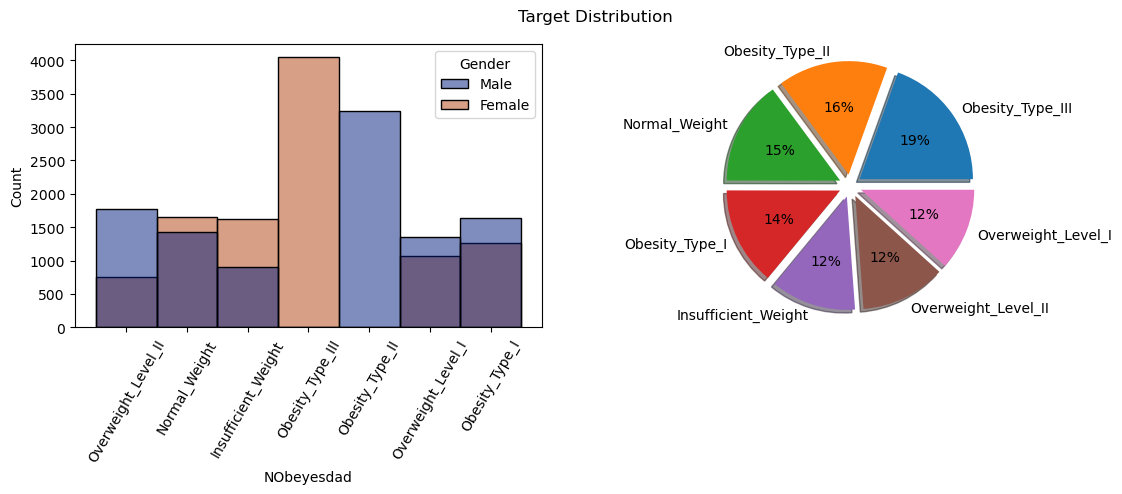

In [11]:
fig, axs = plt.subplots(1,2,figsize = (12,5))
plt.suptitle("Target Distribution")

sns.histplot(binwidth=0.5,x=cfg.TARGET,data=train,hue='Gender',palette="dark",ax=axs[0],discrete=True)
axs[0].tick_params(axis='x', rotation=60)

axs[1].pie(
        train[cfg.TARGET].value_counts(),
        shadow = True,
        explode=[.1 for i in range(train[cfg.TARGET].nunique())],
        labels = train[cfg.TARGET].value_counts().index,
        autopct='%1.f%%',
    )

plt.tight_layout()
plt.show()

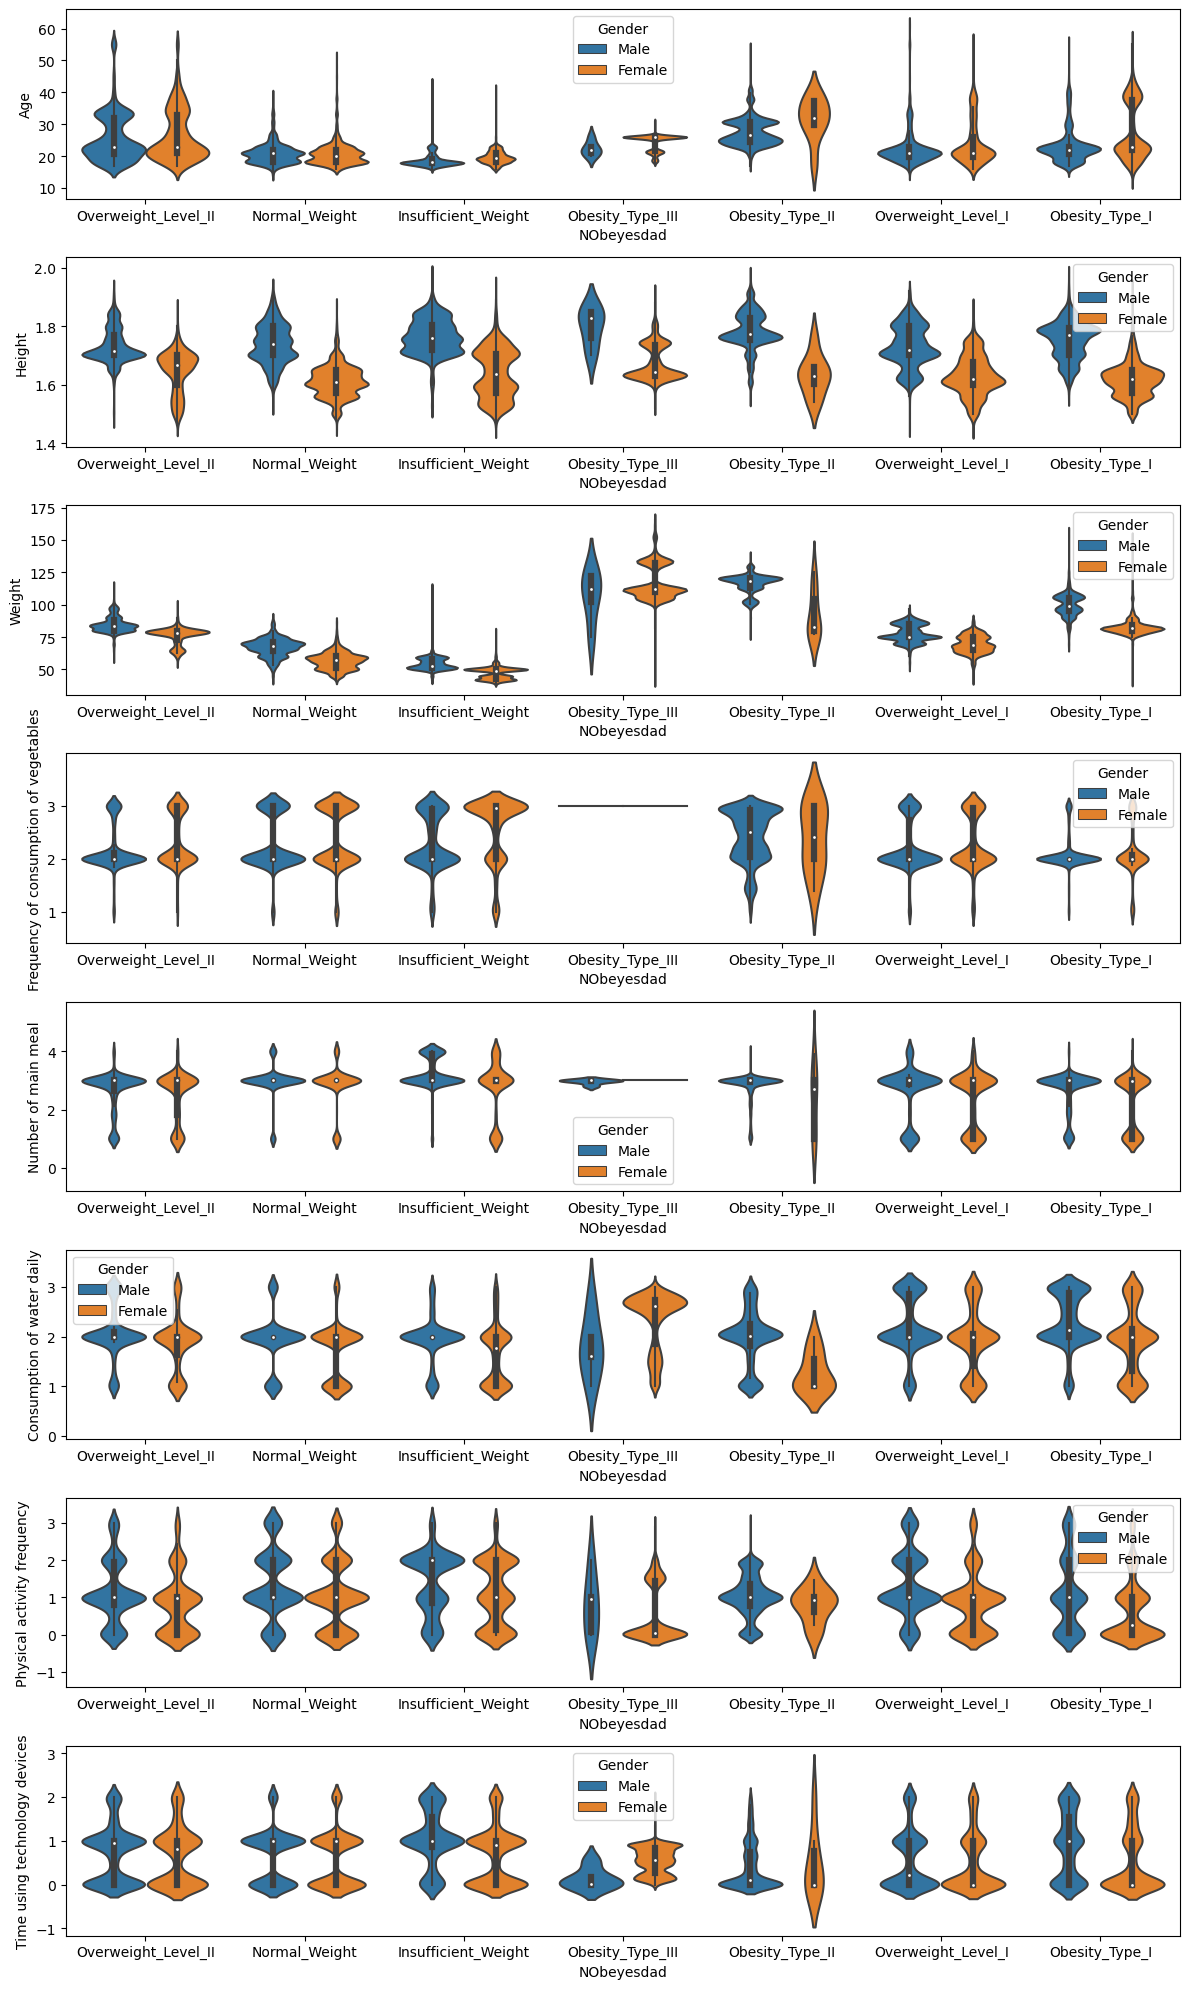

In [12]:
fig,axs = plt.subplots(len(raw_num_cols),1,figsize=(12,len(raw_num_cols)*2.5),sharex=False)
for i, col in enumerate(raw_num_cols):
    sns.violinplot(x=cfg.TARGET, y=col,hue="Gender", data=train,ax = axs[i], split=False)
    if col in full_form.keys():
        axs[i].set_ylabel(full_form[col])

plt.tight_layout()
plt.show()

Insights from above plots:
* We should Ignore, **Female** distribution in `Obesity_Type_II` Class & **Male** distribution in "Obesity_Type_III". because of very small sample size
* We can see People in category of `Insufficient Weight` consumes higher `Number of main Meal` maybe because to gain weight
* `Frequency of consumption of Vegetables` is **Three** for everyone in class `Obesity Type III`
* `Weight`, `Height` & `Gender` looks like the most important features. `Weight` shows very clear differentiation for diff classes

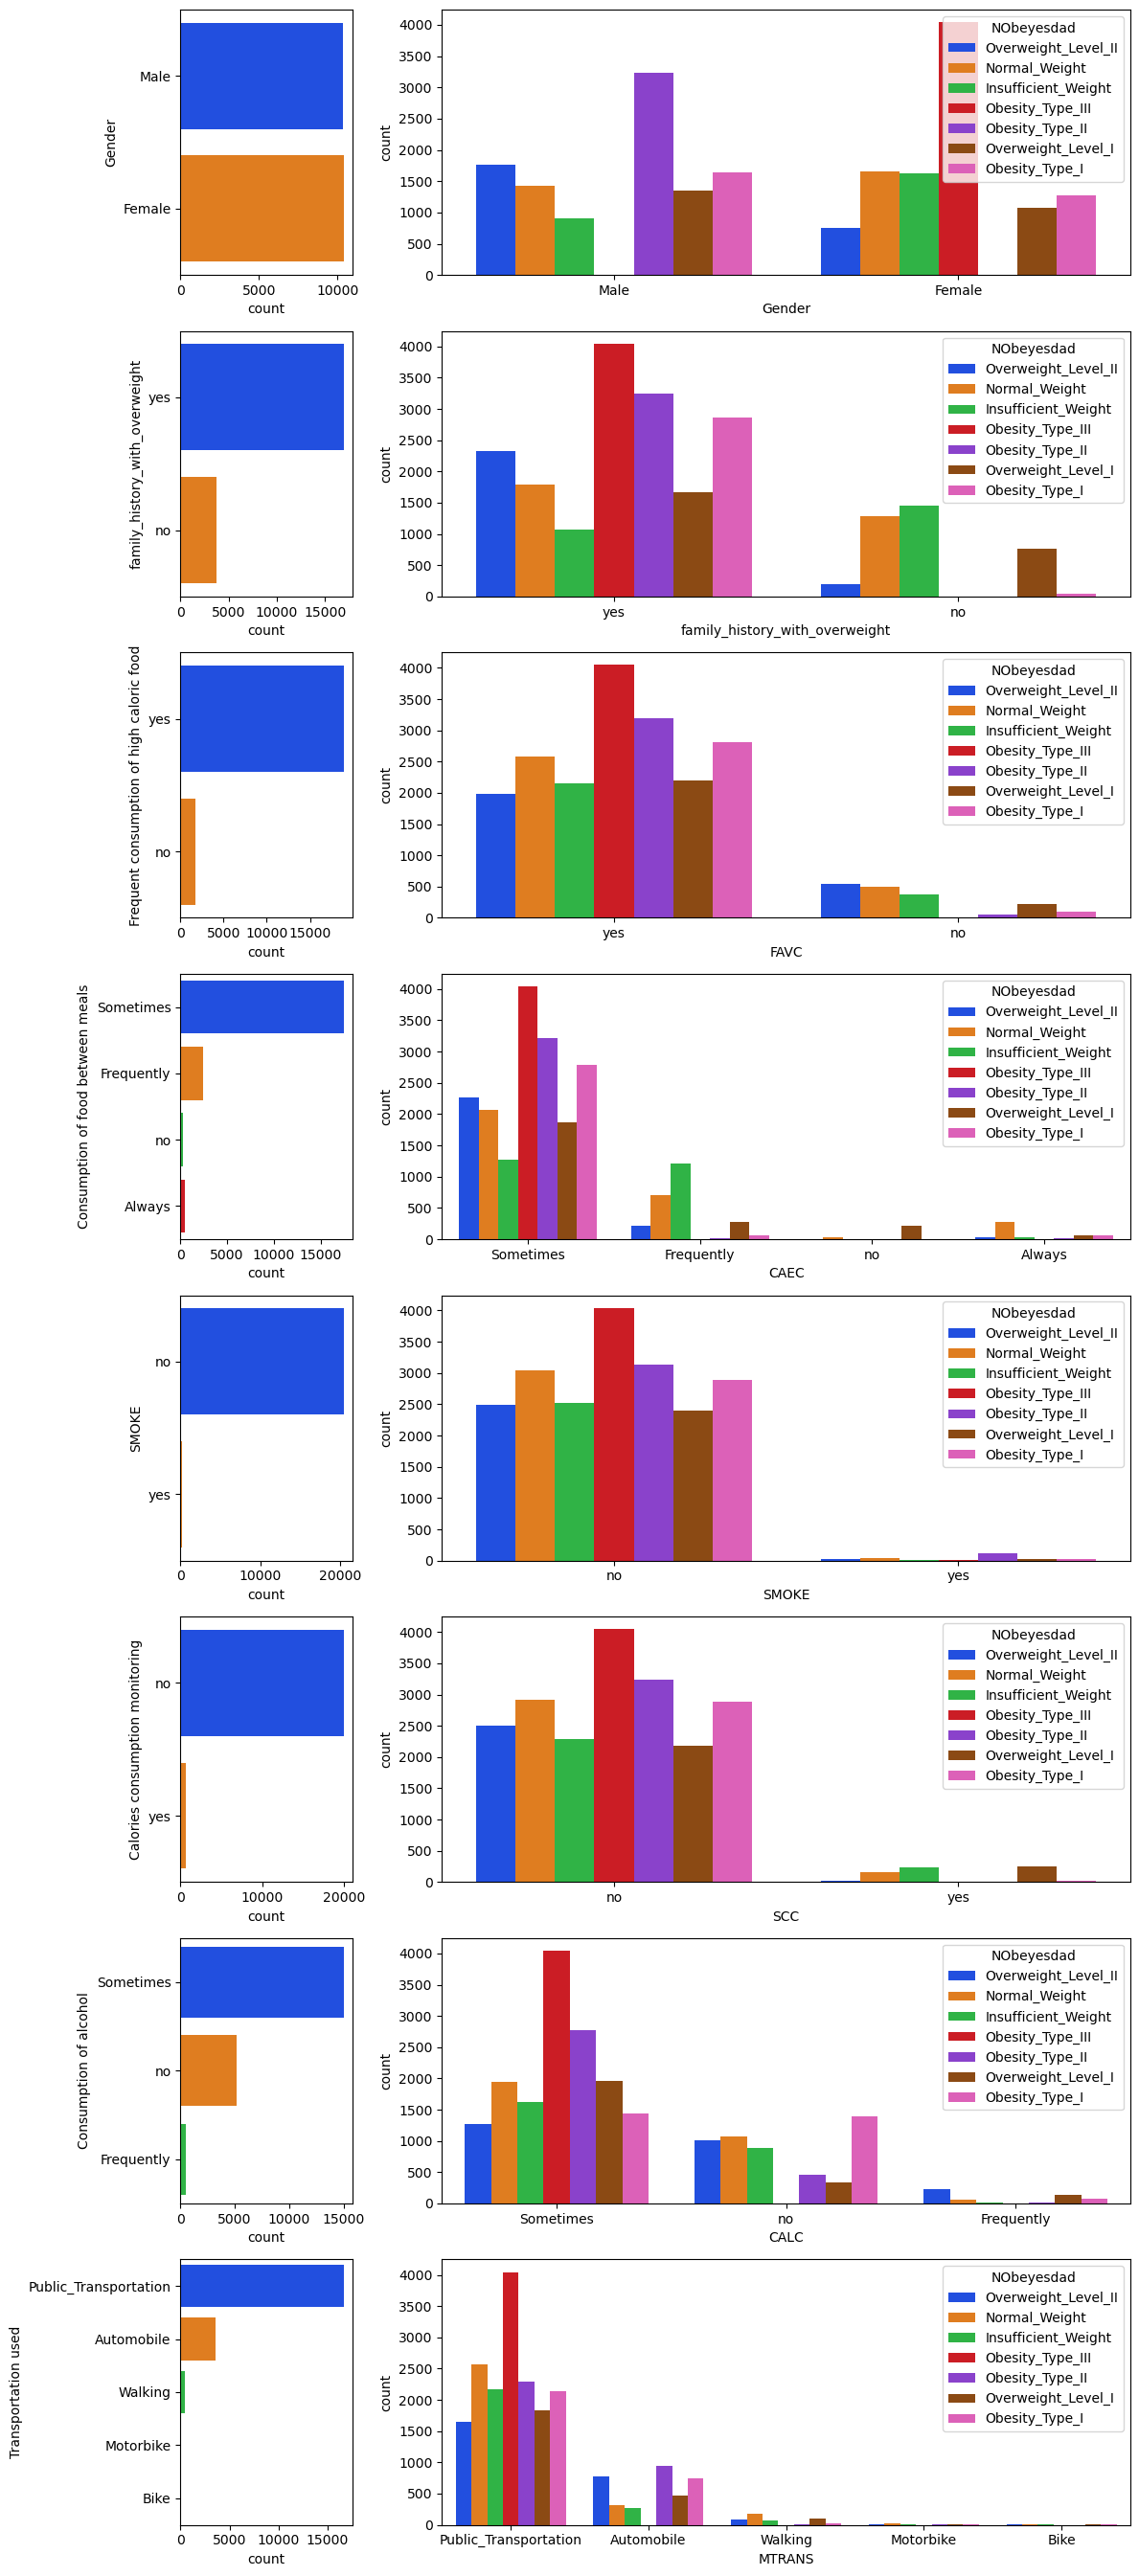

In [13]:
_,axs = plt.subplots(int(len(raw_cat_cols)-1),2,figsize=(12,len(raw_cat_cols)*3),width_ratios=[1, 4])
for i,col in enumerate(raw_cat_cols[1:]):
    sns.countplot(y=col,data=train,palette="bright",ax=axs[i,0])
    sns.countplot(x=col,data=train,hue=cfg.TARGET,palette="bright",ax=axs[i,1])
    if col in full_form.keys():
        axs[i,0].set_ylabel(full_form[col])

plt.tight_layout()
plt.show()

<Axes: >

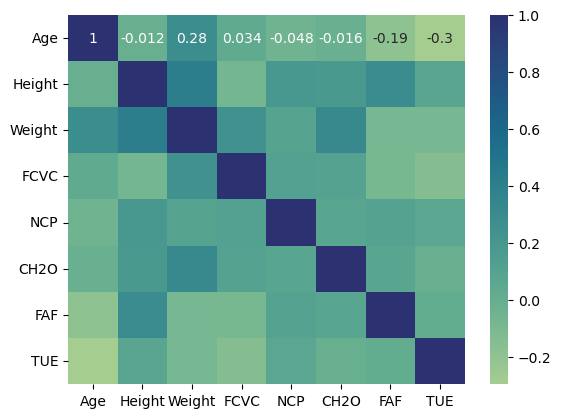

In [14]:
tmp = train[raw_num_cols].corr("pearson")
sns.heatmap(tmp,annot=True,cmap ="crest")

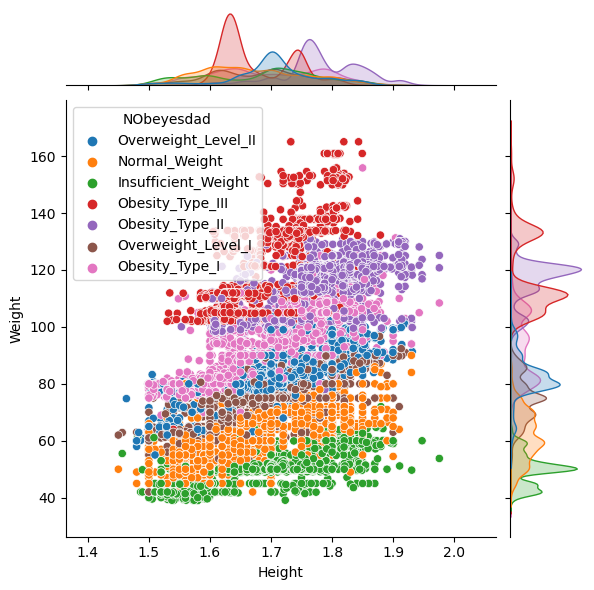

In [15]:
sns.jointplot(data=train, x="Height", y="Weight", hue=cfg.TARGET,height=6)

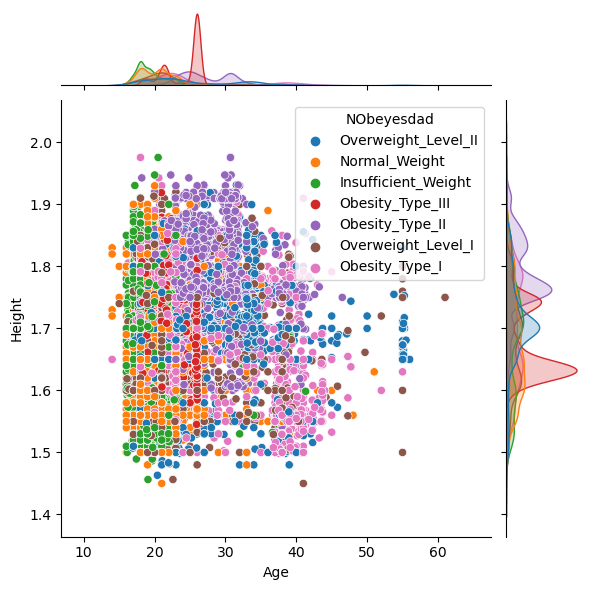

In [16]:
sns.jointplot(data=train, x="Age", y="Height", hue=cfg.TARGET,height=6)

# Principal Component Analysis (PCA) & KMeans
These plots are inspired by [This](https://www.kaggle.com/competitions/playground-series-s4e2/discussion/472471) discussion.

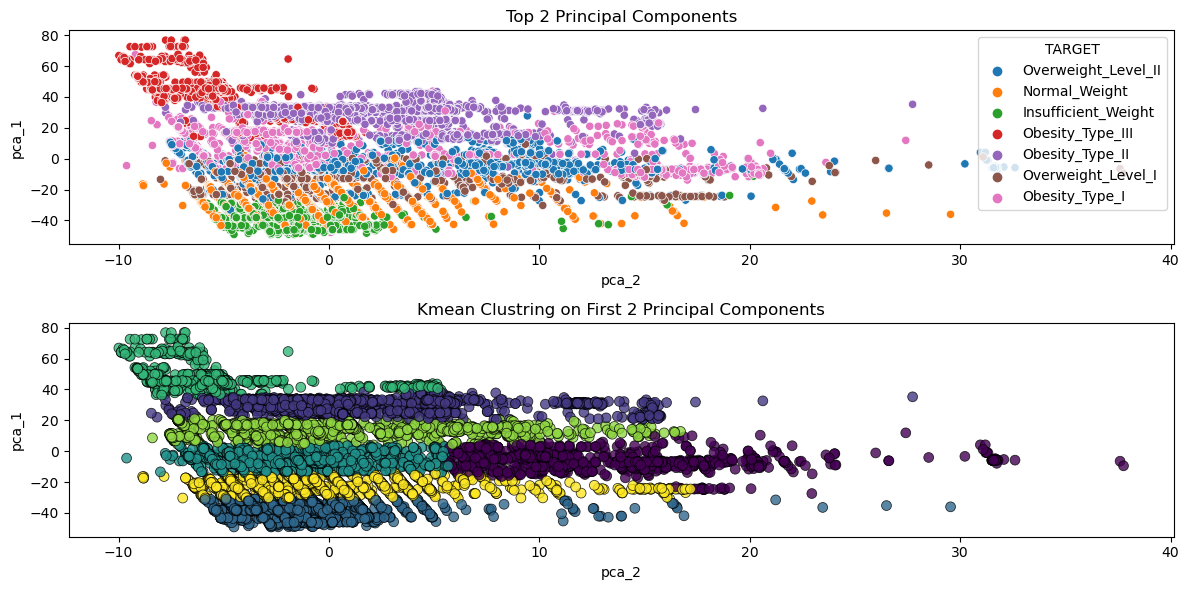

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA
pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(train[raw_num_cols])

tmp = pd.DataFrame(data = pca_top_2, columns = ['pca_1','pca_2'])
tmp['TARGET'] = train[cfg.TARGET]

fig,axs = plt.subplots(2,1,figsize = (12,6))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET',ax=axs[0])
axs[0].set_title("Top 2 Principal Components")

#KMeans
kmeans = KMeans(7,random_state=cfg.RANDOM_SEED)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Kmean Clustring on First 2 Principal Components")
plt.tight_layout()
plt.show()